# APS 2 - Aplicação do Método de Diferenças Finitas

#### OBJETIVO GERAL

Desenvolver uma função, usando o Python, para avaliar o comportamento da temperatura de um dissipador de calor (aleta) aplicando técnicas numéricas de simulação. 

### Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sn
import pandas as pd

### 1. Método das diferenças finitas

Aplique os conceitos do método das diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações. 

Inicialmente, temos que:

$$\dfrac{d^2T}{dx^2} - \dfrac{hP}{kA_{tr}}(T - T_\infty) = \dfrac{1}{\alpha}\cdot\dfrac{dT}{dt}$$

Assim, sabemos que:

$$\dfrac{d^2T}{dx^2} = \dfrac{T^{l}_{i+1} - 2T^{l}_{i} + T^{l}_{i-1}}{\Delta x^2}$$

$$\dfrac{dT}{dt} = \dfrac{T^{l+1}_{i} - T^{l}_{i}}{\Delta t}$$

Considerando que:

$$c = \dfrac{hP}{kA_{tr}}$$

Temos que:

$$T^{l+1}_{i} = T^{l}_{i} + \dfrac{\alpha\Delta t}{\Delta x^2} \cdot (T^{l}_{i+1} - 2T^{l}_{i} + T^{l}_{i-1}) - \alpha\Delta tc\cdot(T^{l}_{i} - T_{\infty})$$

### 2. Função

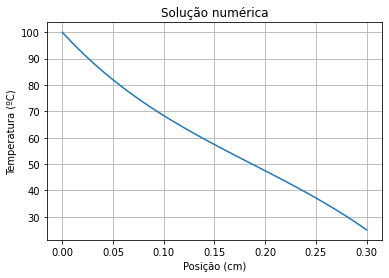

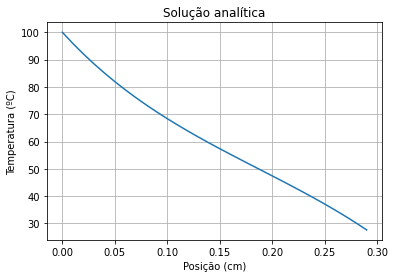

In [27]:
# parâmetros:

# p - densidade do material
# cp - calor específico
# k - condutividade térmica
# h - coeficiente de transferência por convecção
# Tf - temperatura do fluido
# Tb - temperatura da base
# r - raio
# L - comprimento
# dx - delta X
# tt - tempo total
def CTA(p, cp, k, h, Tf, Tb, r, L, dx, tt):
    # Comportamento numérico
    perimetro = 2*math.pi*r
    atr = math.pi*(r**2)
    c = (h*perimetro)/(k*atr)
    alpha = k/(p*cp)
    
    tol = 1e-10
    
    # Delta T
    delta_t = (dx**2/(alpha*(c*dx**2 + 2)))*0.99
    
    # Constante
    cte = alpha*delta_t

    # Número de passos no tempo
    passos = int(tt/delta_t)
    
    # Número de nós
    num_nos = int(L/dx) + 1
    
    # Iniciando a matriz com zeros
    T = np.zeros((passos, num_nos))
    
    # Condições de contorno
    T[:, num_nos-1] = 25
    T[:, 0] = Tb

    erro = 0
    instante = 0
    for l in range(0, passos-1):
        lista = []
        for i in range(1, num_nos-1):
            T[l+1, i] = T[l, i] + (cte/(dx**2))*(T[l, i+1] - 2*T[l, i] + T[l, i-1]) - (cte*c*(T[l, i] - Tf))
            
            err = (T[l+1, i] - T[l, i])/T[l+1, i]
            
            lista.append(err)
        
        if (max(lista) < tol):
            erro = max(lista)
            instante = l
            break           
            
    if (instante > 0):
        T = np.array(T[instante, :])
    else:
        T = np.array(T[passos-1, :])
    x = np.linspace(0, L, num_nos)

    plt.plot(x, T)
    plt.xlabel("Posição (cm)")
    plt.ylabel("Temperatura (ºC)")
    plt.title("Solução numérica")
    plt.grid()
    plt.show()
    
    
    # Comportamento analítico
    m = math.sqrt((h*perimetro)/(k*atr))
    v = h/(m*k)
    cosh_mL = math.cosh(m*L)
    senh_mL = math.sinh(m*L)
    
    lista_pos = np.arange(0, L, 0.01)
    lista_temp = []
    for x in lista_pos:
        res = (((25-Tf)/(Tb-Tf))*math.sinh(m*x)+math.sinh(m*(L-x)))/(senh_mL)
        t = res*(Tb-Tf) + Tf
        lista_temp.append(t)
    
    plt.title("Solução analítica")
    plt.plot(lista_pos, lista_temp) 
    plt.xlabel("Posição (cm)")
    plt.ylabel("Temperatura (ºC)")
    plt.grid()
    plt.show()
    
    return erro, instante
    
erro, instante = CTA(2700, 896, 180, 50, 50, 100, 10/1000, 300/1000, 1e-2, 1000)

In [28]:
if (erro != 0):
    print('Erro relativo máximo: {} no instante {}'.format(erro, instante))
else:
    print('O tempo é pequeno demais por isso não chegou ao ponto onde o erro é menor que a tolerância')

O tempo é pequeno demais por isso não chegou ao ponto onde o erro é menor que a tolerância
